In [98]:
import pydicom as dicom
import matplotlib.pylab as plt
import cv2
import numpy as np

(512, 512)

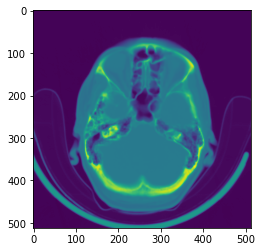

In [37]:
##### Reading a dicom image
img_dcm = 'ID_0002a616e.dcm' ##Specify the path
img_arr = dicom.dcmread(img_dcm)

##### Plotting the image
plt.imshow(img_arr.pixel_array)

##### Shape of the image array
img_arr.pixel_array.shape

In [38]:
def convolution_image(input_image, conv_kernel):
    
    # Kernel dimension
    x_kern = conv_kernel.shape[0]
    y_kern = conv_kernel.shape[1]
    
    # Kernel is flipped both horizontally and vertically
    kernel_lr = np.fliplr(conv_kernel)
    conv_kernel = np.flipud(kernel_lr)
    
    # Add zero padding to the input image
    input_image_pad = np.zeros((input_image.shape[0] + 2, input_image.shape[1] + 2))
    input_image_pad[1:-1, 1:-1] = input_image
    
    # Initialize the output image of convolution
    conv_output = np.zeros_like(input_image)

    # For every pixel of the image, do multiplication with the kernel
    for m in range(input_image.shape[1]):
        for n in range(input_image.shape[0]):
            conv_output[n, m]=(conv_kernel * input_image_pad[n: n + y_kern, m: m + x_kern]).sum()

    return conv_output


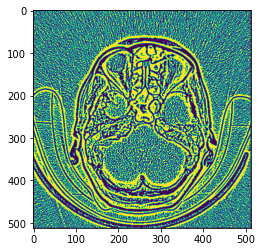

In [44]:
# Q1: Applying linear filter operation.
kernel_mean_lf = np.ones((3,3),np.float32)/9

# Q2: Applying edge detection using the provided filter.
kernel_edge_detect = np.array([[-1,-1,-1], [-1,8,-1], [-1,-1,-1]])

# Calling the convolution function.
convolved_image = convolution_image(img_arr.pixel_array, kernel_edge_detect)

# display image
plt.imshow(convolved_image)

[[0.10737655 0.09838635 0.08872926 ... 0.10636637 0.11611761 0.12540531]
 [0.09928783 0.08979241 0.07953148 ... 0.09710024 0.1074351  0.11721526]
 [0.09086169 0.08078098 0.06980842 ... 0.08731388 0.09833803 0.10869158]
 ...
 [0.13211638 0.12440878 0.11601702 ... 0.07648204 0.08774472 0.09817179]
 [0.14019129 0.13290945 0.12503567 ... 0.08650024 0.09703743 0.10686354]
 [0.1476384  0.14070542 0.1332484  ... 0.09572653 0.10564933 0.11495702]]


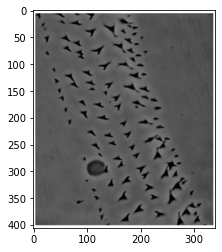

In [57]:
img_rgb = cv2.imread("Big_dentricle.png")
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread("dentricle.png",0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
print(res)
threshold = 0.9
loc = np.where(res >= threshold)

for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)

cv2.imwrite('res.png',img_rgb)

plt.imshow(img_rgb)

In [99]:
img_dent_rgb = cv2.imread("Big_dentricle.png")
temp_dent_rgb = cv2.imread("dentricle.png",0)

print("Original shape of the image and the template: ")
print(temp_dent_rgb.shape, temp_dent_rgb.shape)


match_result = cv2.matchTemplate(img_dent_rgb,temp_dent_rgb, cv2.TM_CCOEFF_NORMED)
min_value, max_value, min_location, max_location = cv2.minMaxLoc(match_result)

h_temp, w_temp = temp_dent_rgb.shape
left_topval = max_location
right_bottomval = left_topval[0] + w_temp, left_topval[1] + h_temp

threshold_val = 0.8
template_matches = np.where(match_result <= threshold_val)

## Find wherever the matches are and draw a rectangle around it.
for (m,n) in zip(template_matches[1], template_matches[0]):
    cv2.rectangle(img_dent_rgb, left_topval, right_bottomval, (255,0,0), 3)

plt.imshow(img_dent_rgb)
cv2.imwrite('result.png',img_dent_rgb)

Original shape of the image and the template: 
(256, 242) (256, 242)


error: OpenCV(4.5.1) /private/var/folders/nz/vv4_9tw56nv9k3tkvyszvwg80000gn/T/pip-req-build-39p1qqfs/opencv/modules/imgproc/src/templmatch.cpp:1163: error: (-215:Assertion failed) (depth == CV_8U || depth == CV_32F) && type == _templ.type() && _img.dims() <= 2 in function 'matchTemplate'


True

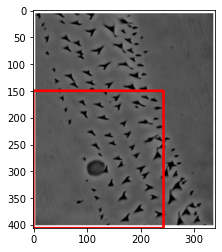

In [52]:
image = cv2.imread('Big_dentricle.png')
# plt.imshow(image)
template = cv2.imread('dentricle.png')

# # resize images
# image = cv2.resize(image, (0,0), fx=0.5, fy=0.5)
# template = cv2.resize(template, (0,0), fx=0.5, fy=0.5)

# Convert to grayscale
imageGray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
templateGray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

# Find template
result = cv2.matchTemplate(image,template, cv2.TM_CCOEFF_NORMED)
# plt.imshow(result)

min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(result)
top_left = max_loc
h,w = templateGray.shape
bottom_right = (top_left[0] + w, top_left[1] + h)

min_thresh = 0.8
match_locations = np.where(result <= min_thresh)

for (x, y) in zip(match_locations[1], match_locations[0]):
    cv2.rectangle(image, top_left, bottom_right, (255,0,0), 3)

# Show result
cv2.imshow("Template", template)
cv2.imshow("Result", image)
plt.imshow(image)
cv2.imwrite('result.png',image)

In [92]:
def NCrossCorr(big_image, small_temp):
    # Normalised Cross Correlation Equation
    sumval = np.sum(big_image * small_temp)
    nsqrt = np.sqrt( (np.sum(big_image ** 2))) * np.sqrt(np.sum(small_temp ** 2))

    return sumval/nsqrt

In [93]:
def match_template(image, template):
    
    # initial parameter
    img_h, img_w = image.shape
    temp_h, temp_w = template.shape
    
    (y_max, x_max) = (0, 0)
    Max_coors = 0
    
    imgage_arr = image
    template_arr = template
    NCC_matrix = np.zeros((img_h - temp_h, img_w - temp_w))

    # calculate value using filter-kind operation from top-left to bottom-right
    for n in range(0, img_h - temp_h):
        for m in range(0, img_w - temp_w):
            trans_image = image[n : n+temp_h, m : m+temp_w] 
            NCC_matrix[n, m] = NCrossCorr(trans_image, template) 
            
            # find the most match area
            if NCC_matrix[n, m] > Max_coors:
                MaxValue = NCC_matrix[n, m]
                (y_max, x_max) = (n, m)

    return (x_max, y_max)

Original shape of the image and the template: 
(256, 242) (256, 242)


True

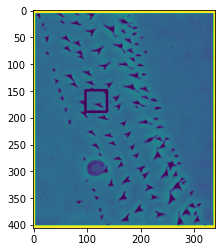

In [103]:
img_dent_rgb = cv2.imread("Big_dentricle.png", 0)
temp_dent_rgb = cv2.imread("dentricle.png", 0)

print("Original shape of the image and the template: ")
print(temp_dent_rgb.shape, temp_dent_rgb.shape)


left_topval = match_template(img_dent_rgb,temp_dent_rgb)
right_bottomval = left_topval[0] + 40, left_topval[1] + 40

cv2.rectangle(img_dent_rgb, left_topval, right_bottomval, (0,0,255), 3)

plt.imshow(img_dent_rgb)
cv2.imwrite('result.png',img_dent_rgb)